# Rain Prediction
**we are going to predict whether it will rain or wont rain tommorrow**

In [1]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error,jaccard_score,accuracy_score ,confusion_matrix,ConfusionMatrixDisplay

In [3]:
data = pd.read_csv(path)
data

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,...,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,...,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,...,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,W,43,W,W,...,56,35,1017.3,1015.1,5,2,12.4,19.0,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [28]:
y = data['RainTomorrow']
x = data.drop(['RainTomorrow','Date'],axis=1)

categorical_columns = [n for n in x.columns if x[n].dtype not in ['float64','int64']]
print("Categorical Columns : ",categorical_columns)
numerical_columns = [n for n in x.columns if x[n].dtype in ['float64','int64']]
print("Numerical Columns : ",numerical_columns)

# encoder = OneHotEncoder(handle_unknown="ignore",sparse_output=False)
# encoded = encoder.fit_transform(x[categorical_columns])
# one_hot_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out(categorical_columns),index=x.index)
# data_processed = pd.concat([x[numerical_columns],one_hot_df],axis=1)

processed_data = pd.get_dummies(data=x,columns=categorical_columns)
processed_data = processed_data.astype('float64')
y.replace(['Yes','No'],[1,0],inplace=True)
x_train,x_valid,y_train,y_valid = train_test_split(processed_data,y,test_size=0.2,random_state=52)
data.info()

Categorical Columns :  ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
Numerical Columns :  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11

Error in data :  0.15572519083969466
Accuracy Score :  0.8442748091603054
Jaccard Score :  0.49


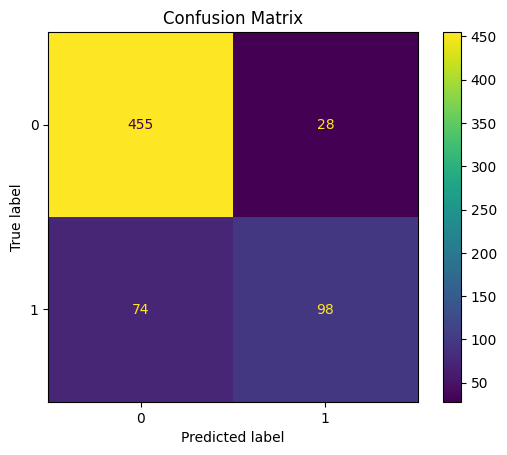

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,jaccard_score,accuracy_score ,confusion_matrix,ConfusionMatrixDisplay
param_grid = {
    "n_estimators" : [100,200,300,400,500,600,700,800],
    "criterion" : ["gini","entropy"],
    "min_samples_split" : [n for n in range(2,8)],
    "min_samples_leaf" : [n for n in range(1,5)],
}
RFmodel = RandomForestClassifier()

Grid_search = GridSearchCV(estimator=RFmodel,param_grid=param_grid,cv=2,n_jobs=-1)
Grid_search.fit(x_train,y_train)
y_preds = Grid_search.predict(x_valid)

print("Error in data : ",mean_absolute_error(y_valid,y_preds))
print("Accuracy Score : ",accuracy_score(y_valid,y_preds))
print("Jaccard Score : ",jaccard_score(y_valid,y_preds))

cm = confusion_matrix(y_valid,y_preds,labels=[0,1])
cmaps = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
cmaps.plot()
plt.title("Confusion Matrix")
plt.show()

# Using logistic regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


error in Data :  0.14961832061068703
jaccard Scores :  0.5025380710659898
accuracy Scores :  0.850381679389313


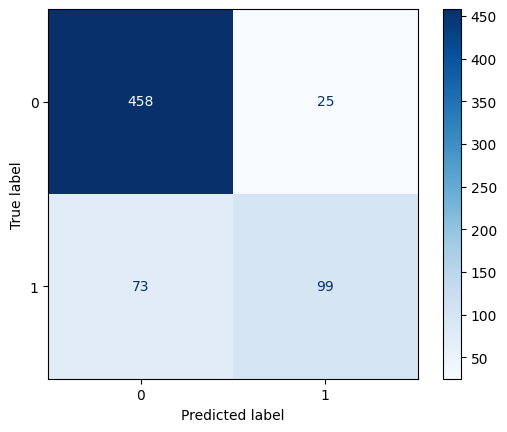

In [ ]:
from sklearn.linear_model import LogisticRegression
param_grid = {
    "C" :[0.1,0.01,0.001],
    "solver" : ['lbfgs', 'liblinear','newton-cg', 'newton-cholesky', 'sag', 'saga'],
}
lr = LogisticRegression()

Grid_search = GridSearchCV(estimator=lr,param_grid=param_grid,n_jobs=-1)
Grid_search.fit(x_train,y_train)
y_preds = Grid_search.predict(x_valid)

print("error in Data : ",mean_absolute_error(y_valid,y_preds))
print("jaccard Scores : ",jaccard_score(y_valid,y_preds))
print("accuracy Scores : ",accuracy_score(y_valid,y_preds))

cm = confusion_matrix(y_valid,y_preds,labels=[0,1])
cmap = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
cmap.plot(cmap="Blues")
plt.show()

# Using Support Vector machine

Error in data :  0.15877862595419848
Accuracy Score :  0.8412213740458016
Jaccard Score :  0.46113989637305697


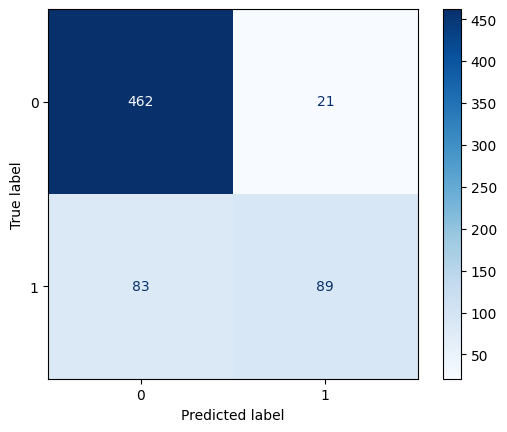

In [ ]:
from sklearn import svm

param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ['linear', 'rbf'],
    "gamma": [0.001, 0.01, 0.1]
}
svm_model = svm.SVC()

Grid_search = GridSearchCV(estimator=svm_model,param_grid=param_grid,cv=3)

Grid_search.fit(x_train,y_train)
y_preds = Grid_search.predict(x_valid)

print("Error in data : ",mean_absolute_error(y_valid,y_preds))
print("Accuracy Score : ",accuracy_score(y_valid,y_preds))
print("Jaccard Score : ",jaccard_score(y_valid,y_preds))

cm = confusion_matrix(y_valid,y_preds,labels=[0,1])
Cmap = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
Cmap.plot(cmap="Blues")
plt.show()

In [ ]:
print(np.logspace(-3,3,5))

[1.00000000e-03 3.16227766e-02 1.00000000e+00 3.16227766e+01
 1.00000000e+03]


# K - Nearest Neigbhour

Error in data :  0.6183206106870229
Accuracy Score :  0.3816793893129771
Jaccard Score :  0.060324825986078884


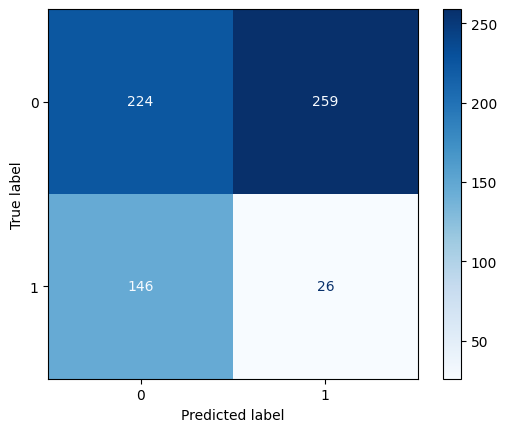

In [6]:
from sklearn.cluster import KMeans
Kn_model = KMeans(n_clusters=2)
Kn_model.fit(x_train,y_train)
y_preds = Kn_model.predict(x_valid)

print("Error in data : ",mean_absolute_error(y_valid,y_preds))
print("Accuracy Score : ",accuracy_score(y_valid,y_preds))
print("Jaccard Score : ",jaccard_score(y_valid,y_preds))

cm = confusion_matrix(y_valid,y_preds,labels=[0,1])
Cmap = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
Cmap.plot(cmap="Blues")
plt.show()

Error in data :  0.14961832061068703
Accuracy Score :  0.850381679389313
Jaccard Score :  0.5050505050505051


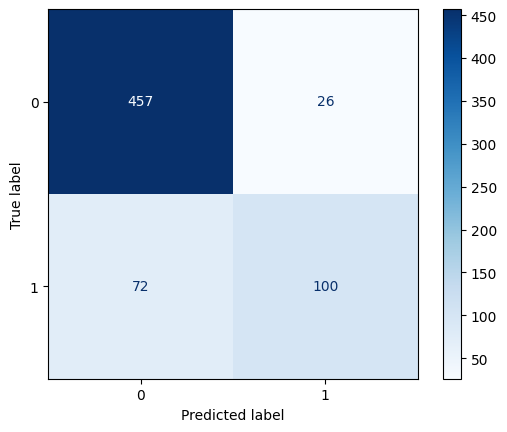

In [25]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators = 750,learning_rate=0.01,gamma=0.1,n_jobs=-1,early_stopping_rounds = 10)
xgb_model.fit(x_train,y_train,eval_set=[(x_valid,y_valid)],verbose=False)
y_preds = xgb_model.predict(x_valid)
print("Error in data : ",mean_absolute_error(y_valid,y_preds))
print("Accuracy Score : ",accuracy_score(y_valid,y_preds))
print("Jaccard Score : ",jaccard_score(y_valid,y_preds))

cm = confusion_matrix(y_valid,y_preds,labels=[0,1])
Cmap = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
Cmap.plot(cmap="Blues")
plt.show()

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
